# Airline Passenger LSTM (RNN)

## Loading required packages

In [1]:
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Loading dataset 

In [190]:
df = pd.read_csv("C:\\Users\\black\\Desktop\\ai_py\\datasets\\airline-passengers.csv")

In [191]:
df.head

<bound method NDFrame.head of     "Month","Passengers"
0          "1949-01",112
1          "1949-02",118
2          "1949-03",132
3          "1949-04",129
4          "1949-05",121
..                   ...
139        "1960-08",606
140        "1960-09",508
141        "1960-10",461
142        "1960-11",390
143        "1960-12",432

[144 rows x 1 columns]>

## Preparing the data

In [192]:
df1 = df['"Month","Passengers"'].str.split(',', expand=True) 

In [193]:
df1.columns = ("Month", "Passengers")

In [194]:
df1["Month"] = df1["Month"].str.replace('"', "")

In [195]:
df1

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [196]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [197]:
df1["Month"] = pd.to_datetime(df1["Month"], format="%Y-%m")

In [198]:
df1

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


## Visualizing the data 

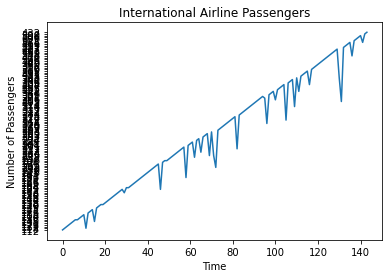

In [199]:
dataset = df1.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.show()

## Data Preprocessing 

In [224]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(144, 1)

In [225]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

## Splitting the data into train and test sets 

In [226]:
train_size = int(len(dataset)*0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print('train_size : {}, test_size : {}'.format(len(train),len(test)))

train_size : 72, test_size : 72


In [227]:
timestamp=10
dataX = []
dataY = []
for i in range(len(train)-timestamp-1):
    a = train[i:(i+timestamp),0]
    dataX.append(a)
    dataY.append(train[i+timestamp,0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [228]:
timestep=10
dataX = []
dataY = []
for i in range(len(test)-timestamp-1):
    a = test[i:(i+timestamp),0]
    dataX.append(a)
    dataY.append(test[i+timestamp,0])
testX = np.array(dataX)
testY = np.array(dataY)

In [229]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

## Building Model-1  

In [211]:
# model
model1 = Sequential()
model1.add(LSTM(10, input_shape=(1, timestamp))) # 10 lstm neuron(block)
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
61/61 [==============================] - 1s 2ms/step - loss: 0.0193
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 8/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 9/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 10/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 12/100
61/61 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 13/100
61/61 [=================

## Predicting using Model-1 

In [212]:
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Model-1 Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Model-1 Test Score: %.2f RMSE' % (testScore))

Model-1 Train Score: 15.40 RMSE
Model-1 Test Score: 42.85 RMSE


## Building Model-2 

In [230]:
# model
model2 = Sequential()
model2.add(LSTM(10, input_shape=(1, timestamp))) # 10 lstm neuron(block)
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='sgd')
model2.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
61/61 [==============================] - 1s 2ms/step - loss: 0.0224
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 8/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 9/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 10/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 11/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 12/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 13/50
61/61 [==============================

## Predicting using Model-2 

In [231]:
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Model-2 Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Model-2 Test Score: %.2f RMSE' % (testScore))

Model-2 Train Score: 0.07 RMSE
Model-2 Test Score: 0.31 RMSE
